# 使用完全连接层估算简单线性回归的参数w、b

In [1]:
# 载入套件
import numpy as np 
import torch

## 产生随机资料

In [2]:
# 产生线性随机资料100笔，介于 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# 资料加一点杂讯(noise)
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

## 定义模型

In [8]:
# 定义模型
def create_model(input_feature, output_feature):
    model = torch.nn.Sequential(
        torch.nn.Linear(input_feature, output_feature),
        torch.nn.Flatten(0, -1) # 所有维度转成一维 
    )
    return model

In [4]:
# 测试扁平层(Flatten)
input = torch.randn(32, 1, 5, 5)
m = torch.nn.Sequential(
    torch.nn.Conv2d(1, 32, 5, 1, 1),
    torch.nn.Flatten()
)
output = m(input)
output.size()

torch.Size([32, 288])

## 定义训练函数

In [16]:
def train(X, y, epochs=2000, lr=1e-6):
    model = create_model(1, 1)

    # 定义损失函数
    loss_fn = torch.nn.MSELoss(reduction='sum') 

    loss_list, w_list, b_list=[], [], []    
    for epoch in range(epochs):   # 执行训练周期
        y_pred = model(X)        # 预测值
        
        # 计算损失函数值
        # print(y_pred.shape, y.shape)
        MSE = loss_fn(y_pred, y) 
        
        # 梯度重置：改由model.zero_grad() 取代 w、b 逐一设定。
        model.zero_grad()
        
        # 反向传导
        MSE.backward()  
        
        # 权重更新：改用 model.parameters 取代 w、b 逐一更新 
        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad
        
        # 记录训练结果
        linear_layer = model[0]
        if (epoch+1) % 1000 == 0 or epochs < 1000:
            w_list.append(linear_layer.weight[:, 0].item())  # w.item()：转成常数
            b_list.append(linear_layer.bias.item())
            loss_list.append(MSE.item())
        
    return w_list, b_list, loss_list

## 执行训练

In [17]:
# 执行训练
X2, y2 = torch.FloatTensor(X.reshape(X.shape[0], 1)), torch.FloatTensor(y)
w_list, b_list, loss_list = train(X2, y2)

# 取得 w、b 的最佳解
print(f'w={w_list[-1]}, b={b_list[-1]}')

w=0.9657057523727417, b=-0.7528998255729675


In [18]:
# 使用不同学习率及更多的执行周期训练
X2, y2 = torch.FloatTensor(X.reshape(X.shape[0], 1)), torch.FloatTensor(y)
w_list, b_list, loss_list = train(X2, y2, epochs=10**5, lr=1e-5)

# 取得 w、b 的最佳解
print(f'w={w_list[-1]}, b={b_list[-1]}')

w=0.9199150800704956, b=0.8257502913475037


## 以NumPy验证

In [19]:
# 执行训练
coef = np.polyfit(X, y, deg=1)

# 取得 w、b 的最佳解
print(f'w={coef[0]}, b={coef[1]}')

w=0.9199132283975492, b=0.8258128006137152


## 以sklearn验证

In [20]:
from sklearn.linear_model import LinearRegression

X2 = X.reshape(X.shape[0], 1)

lr = LinearRegression()
lr.fit(X2, y)

lr.coef_[0], lr.intercept_

(0.9199132283975494, 0.8258128006137007)

## 显示回归线

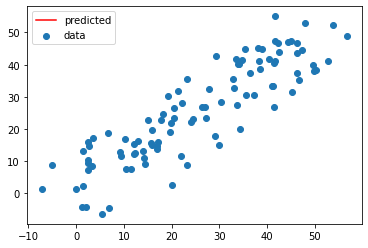

In [21]:
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, w_list[-1] * X + b_list[-1], 'r-', label='predicted')
plt.legend()

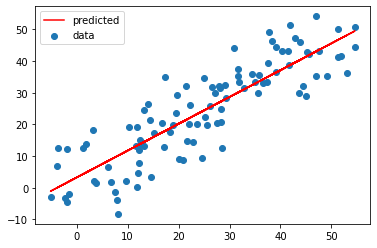

In [169]:
# NumPy 求得的回归线
import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, coef[0] * X + coef[1], 'r-', label='predicted')
plt.legend()

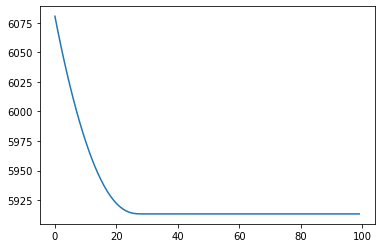

In [176]:
# 损失函数绘图
plt.plot(loss_list)

In [7]:
loss_list

[38636.71875,
 9191346.0,
 2633322240.0,
 754985205760.0,
 216458298654720.0,
 6.205972621662618e+16,
 1.7792843617950237e+19,
 5.101303859116226e+21,
 1.46256970354964e+24,
 4.193266270235945e+26,
 1.2022315817831725e+29,
 3.446860040880396e+31,
 9.882330494630594e+33,
 2.833316666103264e+36,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [15]:
w_list

[21.323238372802734,
 -346.64312744140625,
 5935.47900390625,
 -101316.5625,
 1729752.75,
 -29531332.0,
 504175968.0,
 -8607584256.0,
 146953682944.0,
 -2508878249984.0,
 42833025171456.0,
 -731269990187008.0,
 1.2484665696845824e+16,
 -2.1314544864539443e+17,
 3.638942583775822e+18,
 -6.2126132114738905e+19,
 1.0606535146598847e+21,
 -1.81080913961298e+22,
 3.0915179417746585e+23,
 -5.278018731397172e+24,
 9.01094025443914e+25,
 -1.538399721314246e+27,
 2.6264454142090107e+28,
 -4.484019957324886e+29,
 7.655380099462925e+30,
 -1.3069707674400969e+32,
 2.2313360105277823e+33,
 -inf,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 n